In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.4.1'

In [4]:
# 28x28 images of hand written digits 0-9
mnist = tf.keras.datasets.mnist

In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

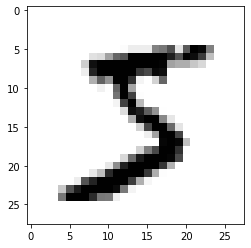

In [24]:
import matplotlib.pyplot as plt

# This'll show the array of image
print(x_train[0])

# This'll print the actual image
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [26]:
# Normalising the data (now we can see above that value lies between 0-255)
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

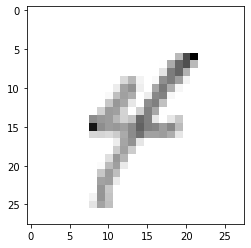

In [27]:
# We can now see that the value lies between 0-1
# This'll show the array of image
print(x_train[0])

# This'll print the actual image
plt.imshow(x_train[61], cmap = plt.cm.binary)

In [28]:
# Building the model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #hidden
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #hidden
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #output

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [29]:
# Training the NN
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4657 - accuracy: 0.8715
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1100 - accuracy: 0.9666
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0717 - accuracy: 0.9779


In [30]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1082 - accuracy: 0.9686
0.10819735378026962 0.9685999751091003


In [31]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


In [32]:
uploaded_model = tf.keras.models.load_model('epic_num_reader.model')

In [33]:
predictions = uploaded_model.predict([x_test])

In [34]:
print(predictions)

[[2.40777265e-09 3.65106771e-08 1.84568717e-06 ... 9.99954939e-01
  2.86753288e-08 1.38898827e-06]
 [2.41363072e-08 2.24001589e-03 9.97695029e-01 ... 4.67020307e-08
  1.19893514e-06 2.73357531e-10]
 [2.95677523e-07 9.99382377e-01 4.60989213e-05 ... 1.19958815e-04
  1.53314104e-04 1.22906358e-05]
 ...
 [1.16588801e-08 4.15942964e-07 3.47274778e-08 ... 1.02896083e-05
  5.87997647e-06 1.21004996e-03]
 [8.92750336e-07 2.62864375e-09 8.08649481e-10 ... 7.80490268e-08
  3.01142245e-05 2.26733068e-08]
 [8.99444274e-07 1.42290419e-08 4.65099426e-09 ... 1.82948674e-11
  2.45940690e-08 2.33159039e-08]]


Predicted Output:  4 

Input: 


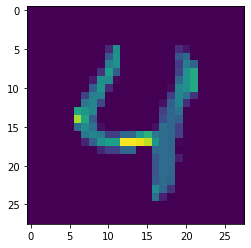

In [41]:
import numpy as np

print("Predicted Output: ", np.argmax(predictions[4]), "\n\nInput: ")

plt.imshow(x_test[4])
plt.show()